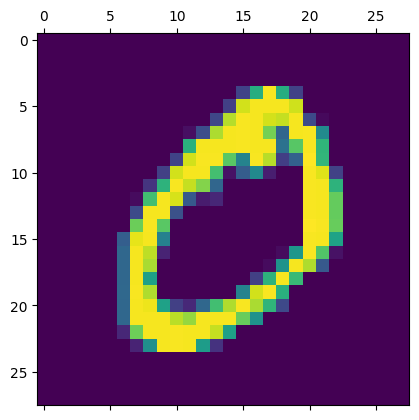

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9077 - loss: 0.2974
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9757 - loss: 0.0784
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9846 - loss: 0.0492
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9872 - loss: 0.0396
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9895 - loss: 0.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9916 - loss: 0.0263
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9932 - loss: 0.0201
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9936 - loss: 0.0195
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9943 - loss: 0.0165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - accuracy: 0.9948 - loss: 0.0164


In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
x_train =x_train.reshape(-1,28*28)
x_test =x_test.reshape(-1,28*28)
x_train=x_train/255.0
x_test=x_test/255.0
x_train[0]
plt.matshow(x_train[1].reshape(28,28))
plt.show()
model=keras.Sequential([
    layers.Dense(784,activation='relu'),
    layers.Dense(392,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)







In [30]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9767 - loss: 0.1127


[0.08868317306041718, 0.9817000031471252]

In [31]:
y_predicted=model.predict(x_test)
y_predicted[1]
np.argmax(y_predicted[1])




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


2

In [32]:
y_test[1]


2

In [33]:
y_test.shape

(10000,)

In [34]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
cf=confusion_matrix(y_test,y_predicted_labels)
cf

array([[ 973,    0,    1,    0,    0,    0,    3,    1,    2,    0],
       [   0, 1126,    2,    0,    0,    0,    7,    0,    0,    0],
       [   1,    0, 1014,    4,    1,    0,    1,    7,    4,    0],
       [   0,    0,    8,  986,    0,    4,    0,    4,    6,    2],
       [   0,    0,    3,    1,  958,    0,    6,    2,    1,   11],
       [   2,    0,    0,    4,    0,  880,    3,    0,    2,    1],
       [   1,    2,    1,    0,    1,    4,  948,    0,    1,    0],
       [   1,    3,    8,    3,    4,    0,    0,  998,    2,    9],
       [   3,    1,    5,    3,    1,    1,    2,    3,  954,    1],
       [   2,    2,    2,    5,   10,    1,    1,    5,    1,  980]])

Text(95.72222222222221, 0.5, 'Truth')

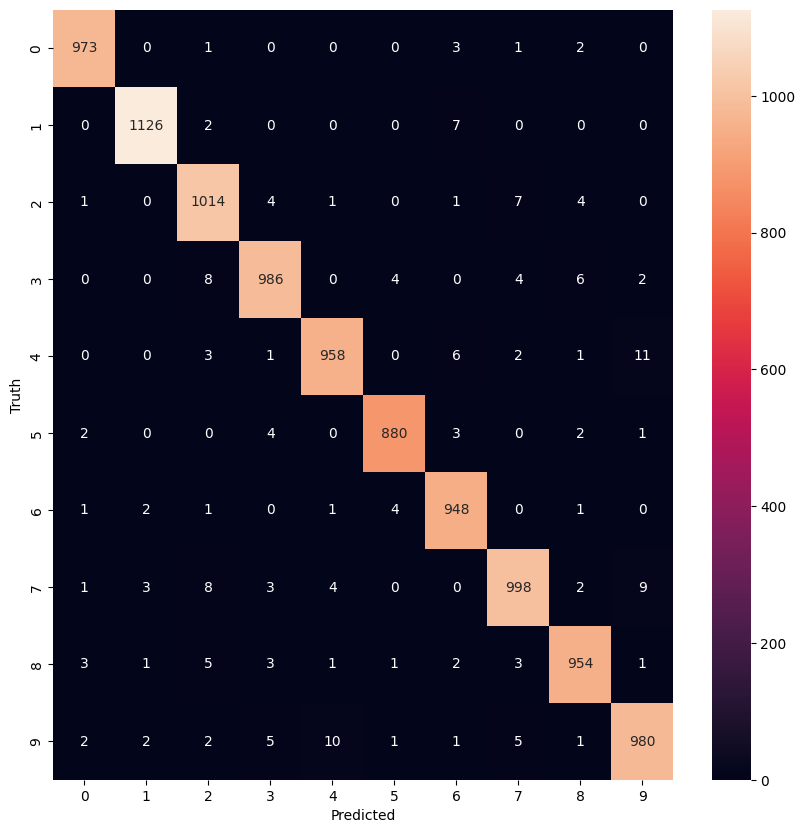

In [37]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')